## Preliminary analysis

This notebook analyzes the MTA subway data for the week of June 10-17, 2017 that can be found here:

http://web.mta.info/developers/turnstile.html

1.Download that SAME file and read it in below. View the first few rows.

In [5]:
#insert 1
import pandas as pd
df = pd.read_csv('turnstile_170617.txt')
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/10/2017,00:00:00,REGULAR,6215258,2104297
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/10/2017,04:00:00,REGULAR,6215284,2104303
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/10/2017,08:00:00,REGULAR,6215318,2104337
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/10/2017,12:00:00,REGULAR,6215475,2104417
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/10/2017,16:00:00,REGULAR,6215841,2104465


2.What are the column names?

In [6]:
#insert 2
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

3.We can see that there is a lot of whitespace at the end of the exits column name. Let's strip that whitespace:

In [7]:
#insert 3
df.columns = df.columns.str.strip()
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

4.How big is the data set?

In [8]:
#insert 4
df.shape

(197209, 11)

5.How many unique stations are there? What are they? Answer each of these questions in one line each.

In [9]:
#insert 5
print("Number of unique stations: ", df.STATION.unique().size)
print("Specifically, they are", df.STATION.unique())


Number of unique stations:  376
Specifically, they are ['59 ST' '5 AV/59 ST' '57 ST-7 AV' '49 ST' 'TIMES SQ-42 ST'
 '34 ST-HERALD SQ' '28 ST' '23 ST' '14 ST-UNION SQ' '8 ST-NYU' 'PRINCE ST'
 'CANAL ST' 'CITY HALL' 'CORTLANDT ST' 'RECTOR ST' 'WHITEHALL S-FRY'
 'DELANCEY/ESSEX' 'BOWERY' 'CHAMBERS ST' 'FULTON ST' 'BROAD ST' '7 AV'
 'PARK PLACE' 'BOTANIC GARDEN' 'PROSPECT PARK' 'PARKSIDE AV' 'CHURCH AV'
 'BEVERLEY ROAD' 'CORTELYOU RD' 'NEWKIRK PLAZA' 'AVENUE H' 'AVENUE J'
 'AVENUE M' 'KINGS HWY' 'AVENUE U' 'NECK RD' 'SHEEPSHEAD BAY'
 'BRIGHTON BEACH' 'OCEAN PKWY' 'BOROUGH HALL' 'JAY ST-METROTEC'
 'DEKALB AV' 'ATL AV-BARCLAY' 'UNION ST' '4AV-9 ST' '25 ST' '36 ST'
 '45 ST' '77 ST' '86 ST' 'BAY RIDGE-95 ST' '8 AV' 'FT HAMILTON PKY'
 'NEW UTRECHT AV' '18 AV' '20 AV' 'BAY PKWY' '9 AV' '50 ST' '55 ST'
 '71 ST' '79 ST' '25 AV' 'BAY 50 ST' 'CONEY IS-STILLW' 'W 8 ST-AQUARIUM'
 '6 AV' '3 AV' '1 AV' 'BEDFORD AV' 'LORIMER ST' 'GRAHAM AV' 'GRAND ST'
 'MONTROSE AV' 'MORGAN AV' 'JEFFERSON ST' 'MYRTLE-WYC

6.Okay, so we understand what station represents. But what the heck are C/A, UNIT, and SCP? Keep in mind that in the larger stations, you might have multiple areas within one station that look like this:

<img src="image.jpg" style="width: 300px;"/>

Further complicating things, there are a few station names like 14TH ST that refer to more than one station location along that street.

This data set is not very well documented. Welcome to the joys of real world data science!!!

Read the following two links carefully to see other people's confusion and what information they have been able to gather:

https://groups.google.com/forum/#!topic/mtadeveloperresources/AMVx2WUY9iI

https://groups.google.com/forum/#!searchin/mtadeveloperresources/%22remote$20unit%22%7Csort:relevance/mtadeveloperresources/z8l3ZU9cY6Y/OFlHGkFAimQJ

It sounds like each C/A + UNIT + SCP + STATION combo refers to a single turnstile. How many unique turnstiles are there? 

In [10]:
#insert 6
df.groupby(['C/A', 'UNIT','SCP','STATION']).size()
#there're 4695

C/A    UNIT  SCP       STATION      
A002   R051  02-00-00  59 ST            42
             02-00-01  59 ST            42
             02-03-00  59 ST            42
             02-03-01  59 ST            42
             02-03-02  59 ST            42
             02-03-03  59 ST            42
             02-03-04  59 ST            42
             02-03-05  59 ST            42
             02-03-06  59 ST            42
             02-05-00  59 ST            42
             02-05-01  59 ST            42
             02-06-00  59 ST            42
A006   R079  00-00-00  5 AV/59 ST       42
             00-00-01  5 AV/59 ST       42
             00-00-02  5 AV/59 ST       42
             00-00-03  5 AV/59 ST       42
             00-00-04  5 AV/59 ST       42
             00-03-00  5 AV/59 ST       42
             00-03-01  5 AV/59 ST       42
             00-03-02  5 AV/59 ST       42
A007   R079  01-05-00  5 AV/59 ST       42
             01-05-01  5 AV/59 ST       42
             01-0

7.What data types are each of the columns?

In [11]:
#insert 7
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197209 entries, 0 to 197208
Data columns (total 11 columns):
C/A         197209 non-null object
UNIT        197209 non-null object
SCP         197209 non-null object
STATION     197209 non-null object
LINENAME    197209 non-null object
DIVISION    197209 non-null object
DATE        197209 non-null object
TIME        197209 non-null object
DESC        197209 non-null object
ENTRIES     197209 non-null int64
EXITS       197209 non-null int64
dtypes: int64(2), object(9)
memory usage: 16.6+ MB


8.We can see that the exits and entries are treated as integers but the others are all treated as objects (strings). Overwrite the time column so that it is a datetime object containing the combined date and time column info (so that the times have a chronological order). 

In [12]:
#insert 8
#don't run again ever!!!
df['TIME'] = df['DATE'] + " " + df['TIME']

In [13]:
df['TIME'] = pd.to_datetime(df['TIME'], format = '%m/%d/%Y %H:%M:%S')
df['TIME'].head()

0   2017-06-10 00:00:00
1   2017-06-10 04:00:00
2   2017-06-10 08:00:00
3   2017-06-10 12:00:00
4   2017-06-10 16:00:00
Name: TIME, dtype: datetime64[ns]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197209 entries, 0 to 197208
Data columns (total 11 columns):
C/A         197209 non-null object
UNIT        197209 non-null object
SCP         197209 non-null object
STATION     197209 non-null object
LINENAME    197209 non-null object
DIVISION    197209 non-null object
DATE        197209 non-null object
TIME        197209 non-null datetime64[ns]
DESC        197209 non-null object
ENTRIES     197209 non-null int64
EXITS       197209 non-null int64
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 16.6+ MB


9.What is the earliest and latest date in our dataset?

In [15]:
#insert 9
print("Earliest Time: ", df['TIME'][0])
print("Latest Time: ", df['TIME'][df['TIME'].size - 1])

Earliest Time:  2017-06-10 00:00:00
Latest Time:  2017-06-16 21:00:00


10.If we wanted to only look at the 34st Street Penn Station stop on 6/12/2017, what would we type?

In [16]:
#insert 10

#use the following line to locate the name of 34st Street Penn Station stop to be "34 ST-PENN STA"
#print (df[df['STATION'].str.contains('34')])

df.loc[df['STATION'] == "34 ST-PENN STA"][df['TIME'] == '6/12/2017']

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [0]:
df.loc[df['STATION'] == "14 ST-UNION SQ"][df['C/A'] == 'A037'][df['UNIT'] == 'R170']

11.Create a dictionary called bigDict. It should contain a nested set of keys and values. The outermost key should be the tuple (C/A,UNIT,STATION) and its value should itself be a dictionary with the SCP as the key and a list of (TIME, EXITS) tuples as its values. The purpose of this section is to prepare data for later uses. It should take a little while to finish running.

In [0]:
df.shape

In [0]:
bigDict = {}

#out_key = ('C/A','UNIT','STATION')
#in_key = 'SCP'
#in_value = ("TIME", "EXITS")

for index, row in df.iterrows():
    out_key = (row["C/A"], row["UNIT"], row["STATION"])
    in_key = row["SCP"]
    in_value = (row["TIME"], row["EXITS"])
    
    #print(cmd, out_key," ", in_key," ", in_value)
        
    #smallDict = {}
    #smallDict[in_key] = {}
    #smallDict[in_key] = in_value
    
    #print(smallDict)
    
    if out_key not in bigDict:
        bigDict[out_key] = {}
        bigDict[out_key][in_key] = {}
        bigDict[out_key][in_key] = [in_value]
    else:
        if in_key not in bigDict[out_key]:
            bigDict[out_key][in_key] = [in_value]
        else:
            bigDict[out_key][in_key].append(in_value)

print(len(bigDict))

12.As an example, use the bigDict to view all of the turnstile data located at the('A037', 'R170', '14 ST-UNION SQ') area:

In [0]:
#insert 12
bigDict.get(('A037', 'R170', '14 ST-UNION SQ'))

13.Create a function called inspection that takes in the (C/A,UNIT,STATION) tuple and SCP value and plots the exit counter data versus time. 

For example, the input of 
```python
inspection(('A037', 'R170', '14 ST-UNION SQ'), '05-00-00')
```
should produce an upward trending plot.

In [0]:
#insert 13
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import datetime as dt
import time

#mytuple = (C/A,UNIT,STATION)

def inspection(mytuple, SCP):
    dates = []
    exit_num = []
    for tup in bigDict[mytuple][SCP]:
        dates.append(tup[0].to_pydatetime())
        exit_num.append(tup[1])
    plt.plot(dates, exit_num)
    plt.show()

inspection(('A037', 'R170', '14 ST-UNION SQ'), '05-00-00')


## Finding Data Errors
14.Due to bugs in MTA data, we will need to remove "incorrect" data. First, find the incorrect data by figuring out which turnstile counters aren't going strictly upwards. How many of these incorrect data values are there? Create a smaller dictionary callled "trouble" that contains the troublesome data from the bigDict.

In [0]:
#insert 14
trouble = {}
incorrect_num = 0

def takeSecond(elem):
    return elem[1]

def upwards(mytuple, SCP):
    data = []
    for tup in bigDict[mytuple][SCP]:
        data.append((tup[0].to_pydatetime(), tup[1]))    
    #data.sort(key = takeFirst)
    all_up= True
    for i in range(len(data) - 1):
        #print(takeSecond(data[i]))
        if takeSecond(data[i]) > takeSecond(data[i + 1]):
            all_up = False
    return all_up
    
for out_key in bigDict.keys():
    for in_key in bigDict[out_key].keys():
        if(upwards(out_key, in_key) == False):  
            incorrect_num = incorrect_num + 1
            in_value = bigDict[out_key][in_key]
            if out_key not in trouble:
                trouble[out_key] = {}
                trouble[out_key][in_key] = {}
                trouble[out_key][in_key] = in_value
            else:
                if in_key not in trouble[out_key]:
                    trouble[out_key][in_key] = in_value
                else:
                    trouble[out_key][in_key].append(in_value)
print("Amount of incorrect num:", incorrect_num)

15.Using the troublesome dictionary and your inspection plotting function, plot all of the troublesome data. There are several different types of errors. What do you think is causing each type?

In [0]:
#insert 15
n = 0

for out_key in trouble:
    for in_key in trouble[out_key]:
        n = n + 1
        print("The", n, "th troublesome data:")
        inspection(out_key, in_key)

## Data Cleanup
There are three types of mistakes: decreasing, garbage values, and turnstile resets.

#### Mistake Type I: Monotone but Decreasing - To fix this, we reflect the data. 

16.Run the cell below to fix it:

In [0]:
def isMonotoneDecrease(mytuple, SCP):
    '''Input: Tuple of (Station,SCP). 
    Output: True if this SCP has monotone property, but decreasing, False otherwise.'''
    data = []
    for tup in bigDict[mytuple][SCP]:
        data.append((tup[0].to_pydatetime(), tup[1]))    
    all_up= True
    for i in range(len(data) - 1):
        if takeSecond(data[i]) < takeSecond(data[i + 1]):
            all_up = False
    return all_up

def fixMonotoneDecrease(mytuple, SCP):
    '''reflects the data to fix it'''
    n = len(bigDict[mytuple][SCP])
    for i in range(n):
        bigDict[mytuple][SCP][i] = (bigDict[mytuple][SCP][i][0],(-1)*bigDict[mytuple][SCP][i][1])
    

monotoneDecreaseList = []
for outkey in trouble:
    '''Input: Tuple of (Station,SCP). '''
    for inkey in trouble[outkey]:
        if(isMonotoneDecrease(outkey, inkey)):
            tup = (outkey, inkey)
            monotoneDecreaseList.append(tup)
print("Total Monotone Decrease:",len(monotoneDecreaseList))

print(monotoneDecreaseList)

for k in monotoneDecreaseList:
    fixMonotoneDecrease(k[0], k[1])
print("Problem Fixed!")

for k in monotoneDecreaseList:
    inspection(k[0], k[1])

#### Mistake Type II: Garbage Value - To fix this, remove the garbage value

17.Run the cell below to fix it:

In [0]:
def garbageEliminator(mytuple, SCP):
    '''removes nonsensical isolated points'''
    n = len(bigDict[mytuple][SCP])
    toDel = []
    for i in range(1,n-1):
        if((bigDict[mytuple][SCP][i-1][1]>bigDict[mytuple][SCP][i+1][1])):
            continue
        if((bigDict[mytuple][SCP][i-1][1]<=bigDict[mytuple][SCP][i][1]) and (bigDict[mytuple][SCP][i][1]<=bigDict[mytuple][SCP][i+1][1])):
            continue
        toDel.append(bigDict[mytuple][SCP][i])
    #Deletion Process
    if(len(toDel)==0):
        return 0
    for k in toDel:
        bigDict[mytuple][SCP].remove(k)
    return 1


#Driver
cnt = 0
healList = []
for outkey in trouble:
    for inkey in trouble[outkey]:
        if(garbageEliminator(outkey, inkey)):
            tup = (outkey, inkey)
            healList.append(tup)
print("Garbage Removed:",len(healList))
for k in healList:
    inspection(k[0], k[1])

#### Mistake Type III: Turnstile Reset - To fix this, shift the data upwards.

18.Run the cell below to fix it:

In [0]:
def dealingWithReset(tup):
    '''for counters that are reset, we fix the data by shifting it upwards'''
    sta = tup[0]
    tsl = tup[1]
    n = len(bigDict[sta][tsl])
    #Detecting Part
    resetPoint = [] # it means (i,i+1) is reset
    resetSet = []
    for i in range(1,n-2):
        if(bigDict[sta][tsl][i][1]<=bigDict[sta][tsl][i+1][1]):
            continue #We don't need to change this one
        resetPoint.append(i)
    #Fixing Part
    resetSet = set(resetPoint)
    cumulative = 0
    for i in range(n-2):
        if(i not in resetSet):
            bigDict[sta][tsl][i] = (bigDict[sta][tsl][i][0],bigDict[sta][tsl][i][1]+cumulative)
            continue
        #Problem
        expected = (bigDict[sta][tsl][i][1]-bigDict[sta][tsl][i-1][1])+ (bigDict[sta][tsl][i+2][1]-bigDict[sta][tsl][i+1][1])
        expected = int(expected/2)
        shift = (bigDict[sta][tsl][i][1]+expected)-bigDict[sta][tsl][i+1][1]
        cumulative = shift
    for i in range(n-2,n):
        bigDict[sta][tsl][i] = (bigDict[sta][tsl][i][0],bigDict[sta][tsl][i][1]+cumulative)
    #Done!
    
#Test Usage
inspection(('JFK03', 'R536', 'JFK JAMAICA CT1'), '00-03-00')
dealingWithReset((('JFK03', 'R536', 'JFK JAMAICA CT1'), '00-03-00'))
print("Cleaned")
inspection(('JFK03', 'R536', 'JFK JAMAICA CT1'), '00-03-00')

In [0]:
def dealingWithReset(mytuple, SCP):
    '''for counters that are reset, we fix the data by shifting it upwards'''
    sta = mytuple
    tsl = SCP
    n = len(bigDict[sta][tsl])
    #Detecting Part
    resetPoint = [] # it means (i,i+1) is reset
    resetSet = []
    for i in range(1,n-2):
        if(bigDict[sta][tsl][i][1]<=bigDict[sta][tsl][i+1][1]):
            continue #We don't need to change this one
        resetPoint.append(i)
    #Fixing Part
    resetSet = set(resetPoint)
    cumulative = 0
    for i in range(n-2):
        if(i not in resetSet):
            bigDict[sta][tsl][i] = (bigDict[sta][tsl][i][0],bigDict[sta][tsl][i][1]+cumulative)
            continue
        #Problem
        expected = (bigDict[sta][tsl][i][1]-bigDict[sta][tsl][i-1][1])+ (bigDict[sta][tsl][i+2][1]-bigDict[sta][tsl][i+1][1])
        expected = int(expected/2)
        shift = (bigDict[sta][tsl][i][1]+expected)-bigDict[sta][tsl][i+1][1]
        cumulative = shift
    for i in range(n-2,n):
        bigDict[sta][tsl][i] = (bigDict[sta][tsl][i][0],bigDict[sta][tsl][i][1]+cumulative)
    #Done!
    
#Test Usage
inspection(('JFK03', 'R536', 'JFK JAMAICA CT1'), '00-03-00')
dealingWithReset(('JFK03', 'R536', 'JFK JAMAICA CT1'), '00-03-00')
print("Cleaned")
inspection(('JFK03', 'R536', 'JFK JAMAICA CT1'), '00-03-00')

## Overall Cleaning Process
19.This next cell does all of the previous cleanup in one cell. Run the cell below:

In [0]:
toClean = {}
for st,stv in bigDict.items():
    for scp,lst in stv.items():
        #Cleaning in Each LIST of turnstile
        toDel = []
        n = len(lst)
        lst.sort()
        for i in range(1,n-1):
            if(lst[i-1][1]<=lst[i][1] and lst[i][1]<=lst[i+1][1]): #What we expected Data to be (Non-Decreasing)
                continue

            key = (st,scp)
            toClean[key] = trouble.get(key,0)+1
            
for k in toClean.keys():
    print(k)
    if(isMonotoneDecrease(k[0], k[1])):
        fixMonotoneDecrease(k[0], k[1])
    garbageEliminator(k[0], k[1])
    dealingWithReset(k[0], k[1])
    inspection(k[0], k[1])

20.Which troublesome stations are left?

In [0]:
trouble = {}
for st,stv in bigDict.items():
    for scp,lst in stv.items():
        #Cleaning in Each LIST of turnstile
        toDel = []
        n = len(lst)
        lst.sort()
        for i in range(1,n-1):
            if(lst[i-1][1]<=lst[i][1] and lst[i][1]<=lst[i+1][1]): #What we expected Data to be (Non-Decreasing)
                continue
                
            key = (st,scp)
            trouble[key] = trouble.get(key,0)+1
print("Trouble List: ",len(trouble.keys()))
for k,v in trouble.items():
    print(k,v)

21.Delete these two keys from bigDict manually:

In [0]:
#insert 21
del bigDict[('PTH11', 'R545', '14TH STREET')]['00-00-03']
del bigDict[('R240', 'R047', 'GRD CNTRL-42 ST')]['00-00-01']

22.The data is now all cleaned, so let's save it so that we don't have to run all of the above code every time. Use the pickle package to save bigDict as an "MTAdict.pkl" file.

In [0]:
#insert 22
import pickle
pickle.dump(bigDict, open("MTAdict.pkl", "wb"))

# --At this point, the data is ready to use and so we are ready for data analysis.--
23.Let's read the cleaned data file back in and save it as bigDict.

In [1]:
#insert 23
import pickle
with open('MTAdict.pkl', 'rb') as f:
    bigDict = pickle.load(f)

24.Create a function called turnstileRiders that takes in a single turnstile's date/exit info and a start and endtime (in datetime format) and returns the number of riders through that turnstile within that time period. As an extension, you may want to use a linear approximation in the case of incomplete information. 

For instance, the input 
```python
t1 = dt.strptime("2017-06-12 00:00:00","%Y-%m-%d %H:%M:%S")
t2 = dt.strptime("2017-06-13 00:00:00","%Y-%m-%d %H:%M:%S")
turnstileRiders(bigDict[('R204', 'R043', 'WALL ST')]["02-00-00"],t1,t2)
```

should output 1419 riders.

In [2]:
#insert 24
import datetime
def turnstileRiders(info,t1,t2): 
    return int(getNumRider(info, t2) - getNumRider(info, t1))

def getNumRider(info, t):
    for i in range(len(info) - 1):
        if t == info[i][0]:
            return int(info[i][1])        
        if (info[i][0] < t and t < info[i + 1][0]):
            return int(info[i][1] + (info[i + 1][1] - info[i][1]) * ((t - info[i][0])/ (info[i + 1][0] - info[i][0])))
    return 0
    
t1 = datetime.datetime.strptime("2017-06-12 00:00:00","%Y-%m-%d %H:%M:%S")
t2 = datetime.datetime.strptime("2017-06-13 00:00:00","%Y-%m-%d %H:%M:%S")
turnstileRiders(bigDict[('R204', 'R043', 'WALL ST')]["02-00-00"],t1,t2)

1419

25.Create a function called stationRiders that calls the turnstileRiders function for each turnstile in a  (C/A,UNIT,STATION) station area and tallies all of the riders through that area between two times.

For example, an input of 
```python
getStationRangeRider(bigDict[('R204', 'R043', 'WALL ST')],dt(2017,6,12,0,0,0),dt(2017,6,13,0,0,0))
```
should output 9507 riders.

In [3]:
#insert 25
def getStationRangeRider(info_big, t1, t2):
    total_rider = 0
    for scp in info_big:
        total_rider = total_rider + turnstileRiders(info_big[scp], t1, t2)
    return total_rider

t1 = datetime.datetime(2017,6,12,0,0,0)
t2 = datetime.datetime(2017,6,13,0,0,0)
getStationRangeRider(bigDict[('R204', 'R043', 'WALL ST')],t1,t2)

9509

26.There are still several station areas within a station. Make a plot of the day of the week versus the number of total station rider exits for the ENTIRE Wall St station.

In [17]:
#insert 26
import pandas as pd
import matplotlib.pyplot as plt

station = 'WALL ST'
dates = pd.date_range(start='6/10/2017 00:00:00', periods = 8)
total_sta_num = [0, 0, 0, 0, 0, 0, 0]
df_station = df.loc[df['STATION'] == station]

In [18]:
for i in range(len(dates) - 2):
    df_smll_sta = df_station.loc[df_station['TIME'] == dates[i]]
    #print(df_smll_sta['C/A'])
    tup1 = []
    tup2 = []
    for ele in df_smll_sta['C/A']:
        tup1.append(ele)
    for ele in df_smll_sta['UNIT']:
        tup2.append(ele)
    for j in range(len(tup1)):
        total_sta_num[i] = total_sta_num[i] + getStationRangeRider(bigDict[(tup1[j], tup2[j], station)], dates[i], dates[i + 1])
print(total_sta_num)

[68923, 50098, 158582, 165697, 168078, 164919, 0]


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


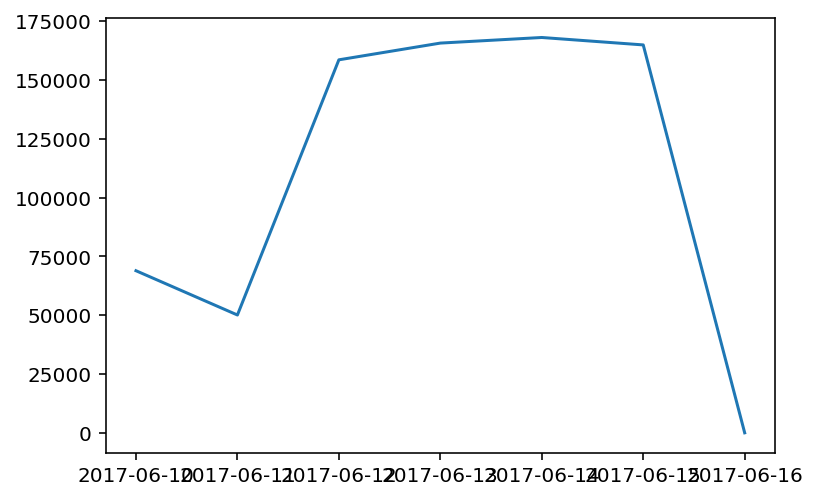

In [19]:
plt.plot(dates[0:7], total_sta_num[0:7])
plt.show()

27.Sort by busiest station areas during 6/12 midnight - 6/13 midnight in descending order by creating a list of sorted tuples:

In [20]:
#insert 27
import operator

busiest_station_area = []
info_tuple = {}
t1 = datetime.datetime(2017,6,12,0,0,0)
t2 = datetime.datetime(2017,6,13,0,0,0)
for out_key in bigDict:
    info_tuple[out_key] = int(getStationRangeRider(bigDict[out_key],t1,t2))

busiest_station_area = sorted(info_tuple.items(), key=operator.itemgetter(1), reverse = True)
print(busiest_station_area)

In [0]:
#each day chronologically corresponds to an element in the list: busiest_top10. Each element consists of a list of top 10 busiest station on the day

In [0]:
import pandas as pd

dates = pd.date_range(start='6/10/2017 00:00:00', periods = 8)

busiest_top10 = []

for i in range(7):
    busiest_station_area = []
    info_tuple = {}
    t1 = datetime.datetime(2017,6, i + 10,0,0,0)
    t2 = datetime.datetime(2017,6, i + 11,0,0,0)
    for out_key in bigDict:
        info_tuple[out_key] = int(getStationRangeRider(bigDict[out_key],t1,t2))
    busiest_station_area = sorted(info_tuple.items(), key=operator.itemgetter(1), reverse = True)
    busiest_top10.append(busiest_station_area[:10])
print(busiest_top10)

28.Make a dictionary called total_dict that contains the station name as its key and the total number of riders through all of its station areas between 6/12-6/13 as its value. Then create a sorted list of tuples to view the busiest stations on that day.

In [21]:
#insert 28
total_dict = {}
busiest_station = []
for tup in busiest_station_area:
    station = tup[0][2]
    if station not in total_dict:
        total_dict[station] = tup[1]
    else:
        total_dict[station] = total_dict[station] + tup[1]

busiest_station = sorted(total_dict.items(), key=operator.itemgetter(1), reverse = True)
print(busiest_station)

[('34 ST-PENN STA', 136837), ('GRD CNTRL-42 ST', 135085), ('34 ST-HERALD SQ', 109563), ('TIMES SQ-42 ST', 91048), ('14 ST-UNION SQ', 88416), ('23 ST', 85491), ('FULTON ST', 81130), ('42 ST-PORT AUTH', 72937), ('86 ST', 72800), ('47-50 STS ROCK', 62141), ('125 ST', 58529), ('PATH NEW WTC', 57293), ('59 ST', 57251), ('59 ST COLUMBUS', 55966), ('CANAL ST', 55869), ('CHAMBERS ST', 50766), ('96 ST', 48913), ('14 ST', 47861), ('LEXINGTON AV/53', 47196), ('72 ST', 46476), ('FLUSHING-MAIN', 46095), ('WALL ST', 43674), ('28 ST', 42840), ('42 ST-BRYANT PK', 40872), ('ATL AV-BARCLAY', 39204), ('50 ST', 38847), ('JKSN HT-ROOSVLT', 37885), ('W 4 ST-WASH SQ', 36078), ('7 AV', 35483), ('JAMAICA CENTER', 33735), ('145 ST', 30358), ('BOWLING GREEN', 29966), ('77 ST', 29234), ('BEDFORD AV', 28806), ('5 AV/53 ST', 28603), ('KEW GARDENS', 27568), ('JOURNAL SQUARE', 27394), ('LEXINGTON AV/63', 27153), ("B'WAY-LAFAYETTE", 27066), ('CHURCH AV', 27059), ('8 AV', 26274), ('KINGS HWY', 25909), ('GRAND ST', 2545

29.Make a histogram of those station totals:

In [22]:
#insert 29
import matplotlib.pyplot as plt

stations = []
num = []

for tup in busiest_station:
    stations.append(tup[0])
    num.append(tup[1])

In [23]:
pass_num = pd.DataFrame(num, index = stations)
print("2017/6/12 - 2017/6/13")
pass_num

2017/6/12 - 2017/6/13


,0
34 ST-PENN STA,136837
GRD CNTRL-42 ST,135085
34 ST-HERALD SQ,109563
TIMES SQ-42 ST,91048
14 ST-UNION SQ,88416
23 ST,85491
FULTON ST,81130
42 ST-PORT AUTH,72937
86 ST,72800
47-50 STS ROCK,62141


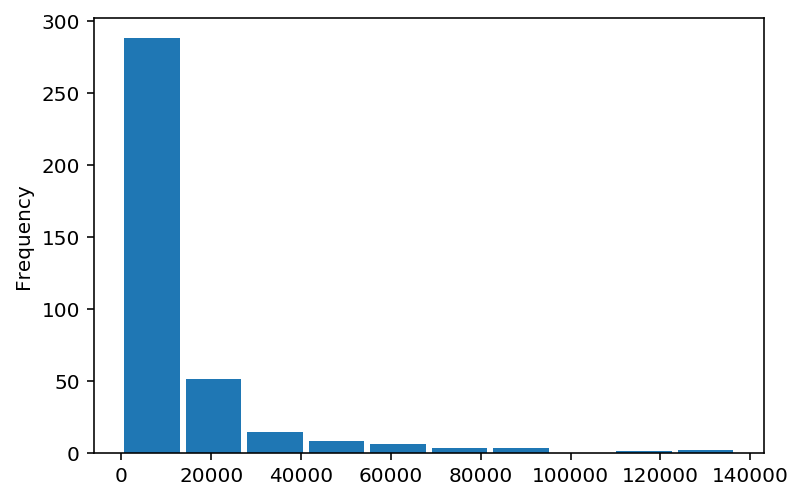

In [24]:
pass_num[0].plot.hist(rwidth=.9)

30.Create a commuter index to be the average weekday exits divided by the sum of the avg weekday exits + avg weekend exits. To do this, first make a function called isWeekday that returns True if the datetime input is a weekday and False if it isn't.

In [25]:
#insert 30
import datetime
def isWeekday(date):
    if date.isoweekday() == 6 or date.isoweekday() == 7:
        return False
    return True
print(isWeekday(datetime.date(2019, 4, 30)))

True


31.Make a function called commuterIndex that inputs a (C/A,UNIT,STATION) tuple and outputs its commuter index. 

For example, the output of 
```python
getCommuteIndex(('PTH11', 'R545', '14TH STREET'))
```
should be 0.663.

In [0]:
#insert 31
dates = pd.date_range(start='6/10/2017 00:00:00', periods = 8)

def getCommuteIndex(tup):
    weekday_com = 0.0
    week_com = 0.0
    #print(weekday_com, week_com)

    for i in range(6):
        num = getStationRangeRider(bigDict[tup], dates[i], dates[i + 1])
        if isWeekday(dates[i]):
            weekday_com = weekday_com + num
            #print(weekday_com)
        week_com = week_com + num
        #print(week_com)
    #print(weekday_com, week_com)
    return weekday_com / week_com

getCommuteIndex(('PTH11', 'R545', '14TH STREET'))

32.Create a sorted list of tuples in descending order containing the commuter index and the station area tuple.

In [0]:
#insert 32

commute_dict = {}
commute = []
for tup in bigDict:
    if tup not in commute_dict:
        commute_dict[tup] = getCommuteIndex(tup)
    else:
        commute_dict[tup] = commute_dict[tup] + getCommuteIndex(tup)

commute = sorted(commute_dict.items(), key=operator.itemgetter(1), reverse = True)
print(commute)

33.Remember that there are still several station areas within each station. Let's get all of the commuter indexes for each station area and then take the median of that commuter index to assign to the entire station. Create a sorted list of tuples in descending order containing the median commuter index and the station name.

In [0]:
#insert 33
commute_dict_med = {}
commute_med = []
for tup in bigDict:
    if tup not in commute_dict_med:
        commute_dict_med[tup] = getCommuteIndex(tup)
    else:
        commute_dict_med[tup] = commute_dict_med[tup] + getCommuteIndex(tup)

commute_med = sorted(commute_dict_med.items(), key=operator.itemgetter(1), reverse = True)
print(commute_med)

In [0]:
num_tup = []
for i in range(21):
    num_tup.append((i+1, i + 2, i + 3, i + 4))
num_tup

### How can you use what you have done so far to make decisions about MTA advertising???